In [1]:
from collections import Counter
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import spacy

data = pd.read_json('data/data.json')

### 1 - PIE CHARTS

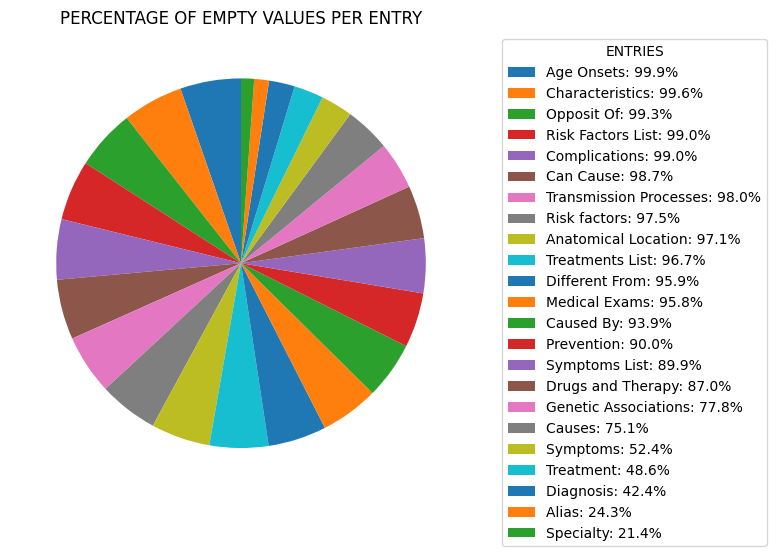

In [2]:
missing_percentages_per_entry = data.isnull().mean(axis=1) * 100
missing_percentages_per_entry = missing_percentages_per_entry[missing_percentages_per_entry > 0]

if missing_percentages_per_entry.empty:
    print("There is no empty spaces")
else:
    missing_percentages_per_entry = missing_percentages_per_entry.sort_values(ascending=False)
    plt.figure(figsize=(6, 6))
    wedges, texts = plt.pie(missing_percentages_per_entry, startangle=90)
    plt.title("PERCENTAGE OF EMPTY VALUES PER ENTRY")
    legend_labels = [f'{index}: {value:.1f}%' for index, value in zip(missing_percentages_per_entry.index, missing_percentages_per_entry)]
    plt.legend(legend_labels, title="ENTRIES", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

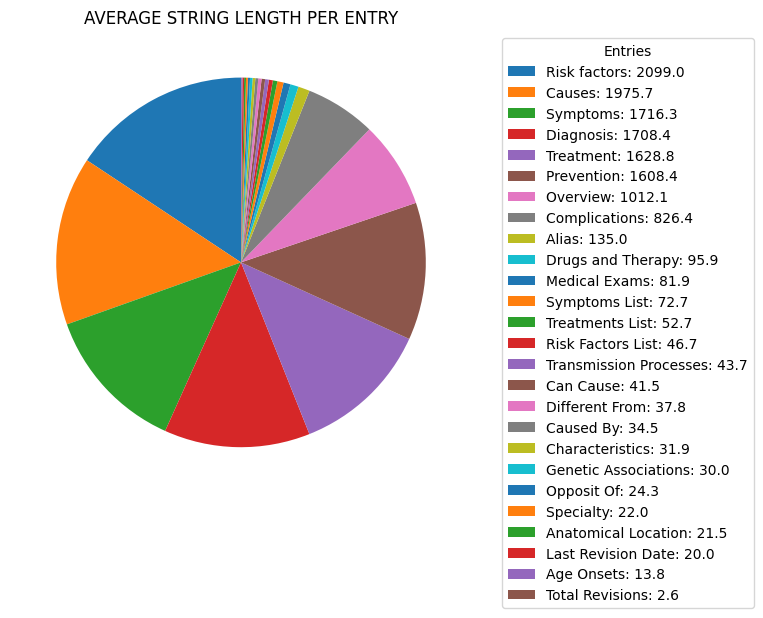

In [3]:
def mean_string_length(entry):
    strings = entry.dropna().astype(str)
    string_lengths = strings.apply(len)
    return string_lengths.mean()

mean_lengths_per_entry = data.apply(mean_string_length, axis=1)
mean_lengths_per_entry = mean_lengths_per_entry[mean_lengths_per_entry.notna()]

if mean_lengths_per_entry.empty:
    print("There are no valid string lengths in any entry.")
else:
    mean_lengths_per_entry = mean_lengths_per_entry.sort_values(ascending=False)
    plt.figure(figsize=(6, 6))
    wedges, texts = plt.pie(mean_lengths_per_entry, startangle=90)
    plt.title("AVERAGE STRING LENGTH PER ENTRY")
    legend_labels = [f'{index}: {value:.1f}' for index, value in zip(mean_lengths_per_entry.index, mean_lengths_per_entry)]
    plt.legend(legend_labels, title="Entries", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()


### 2 - 10 MOST COMMON

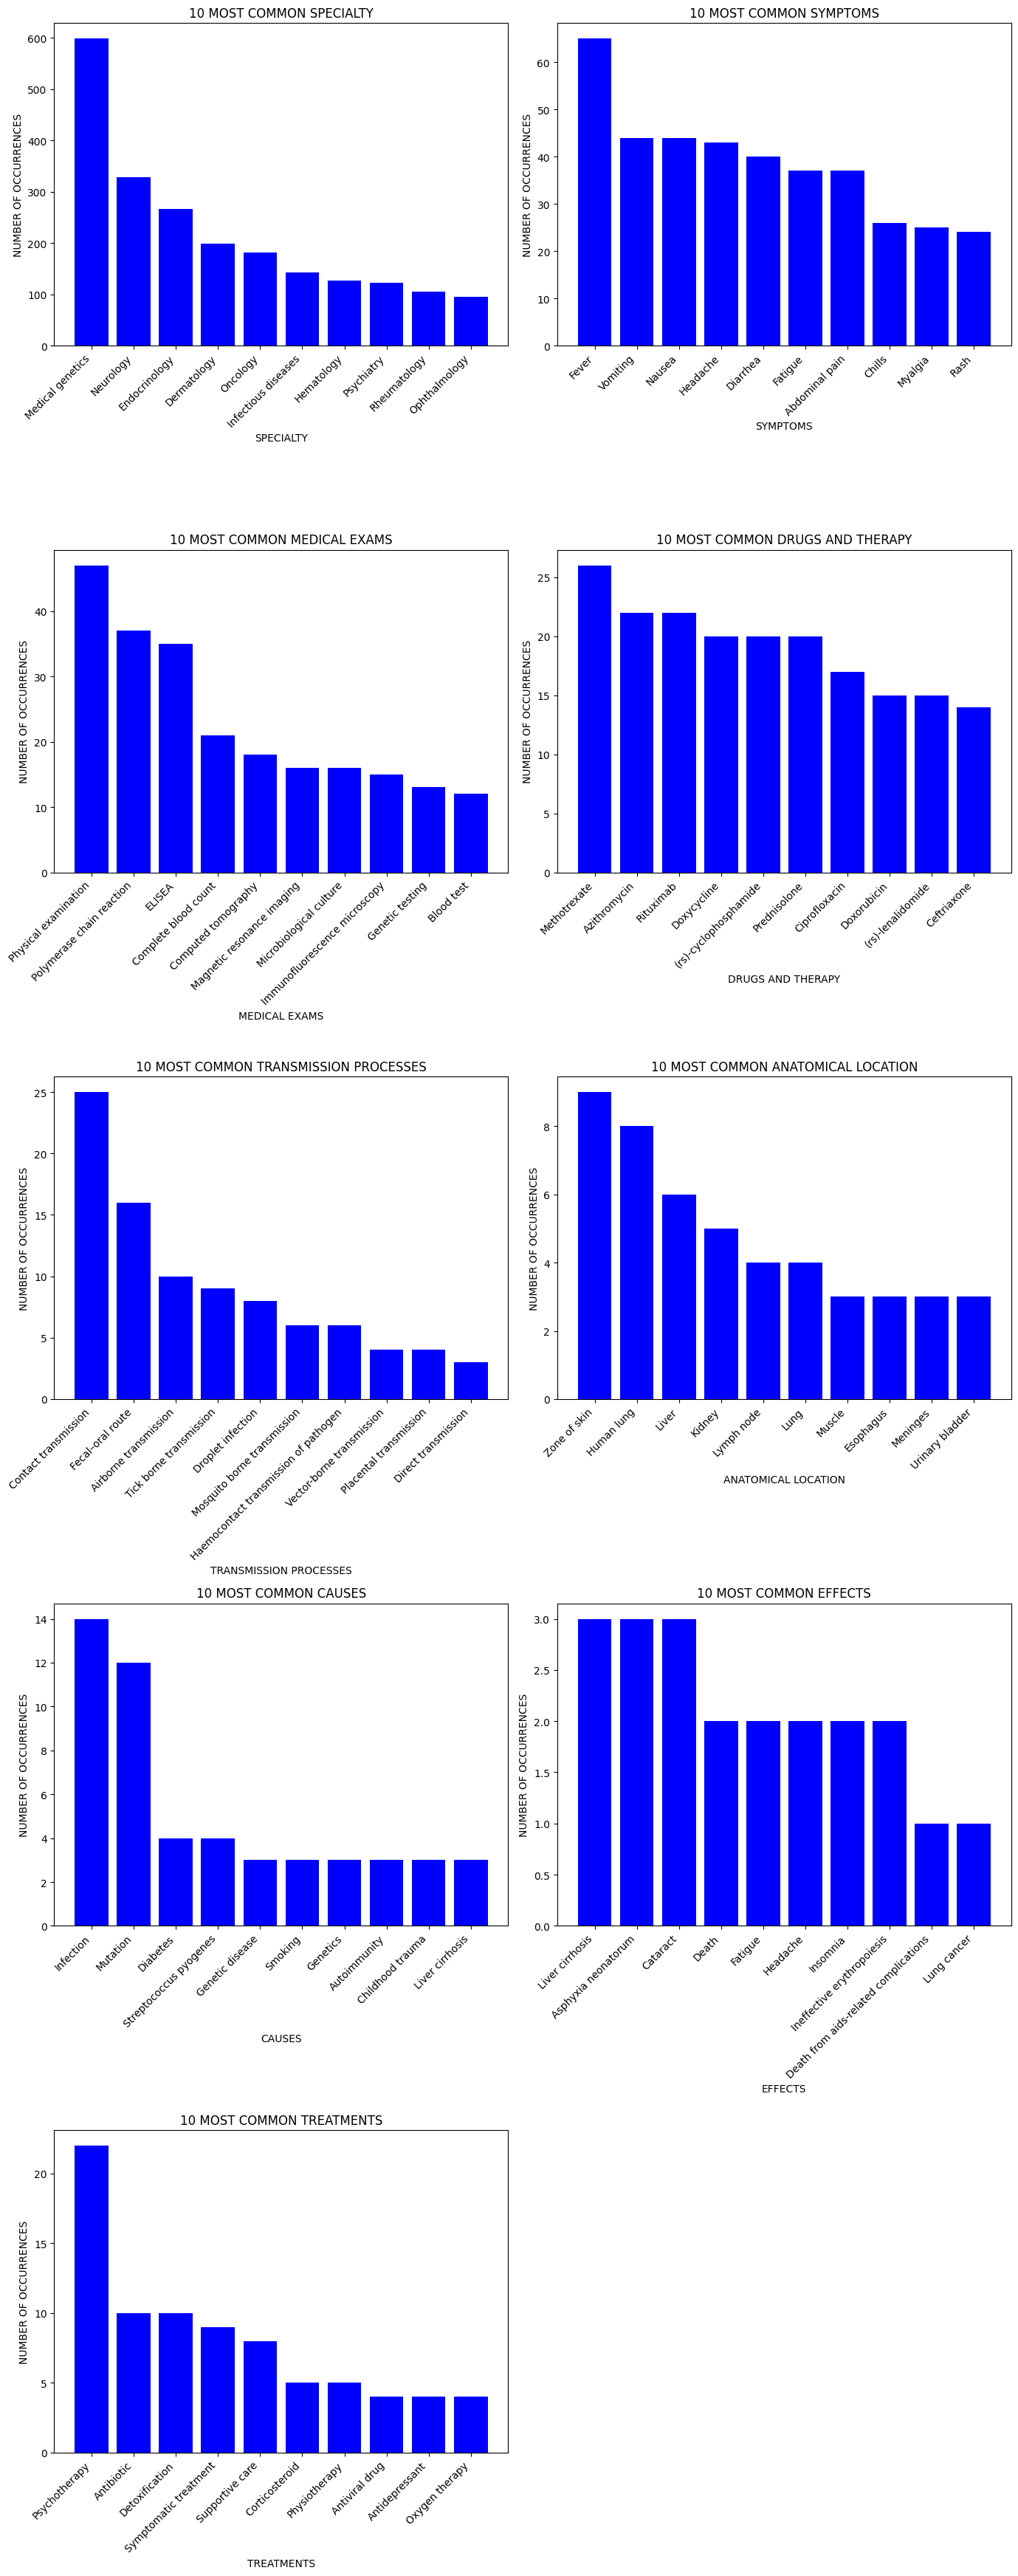

In [4]:
entries = [
    ("Specialty","Specialty".upper()),                              # 0
    ("Symptoms List","Symptoms".upper()),                           # 1
    ("Medical Exams","Medical Exams".upper()),                      # 2
    ("Drugs and Therapy","Drugs and Therapy".upper()),              # 3
    ("Transmission Processes","Transmission Processes".upper()),    # 4
    ("Anatomical Location","Anatomical Location".upper()),          # 5
    ("Caused By","Causes".upper()),                                 # 6
    ("Can Cause","Effects".upper()),                                # 7
    ("Treatments List","Treatments".upper())]                       # 8

num_entries = len(entries)
cols = 2
rows = (num_entries + cols - 1) // cols

plt.figure(figsize=(14, 7 * rows))

for i, (entry,title) in enumerate(entries):
    if entry in data.index:
        all_words = []
        for col in data.columns:
            words = data.at[entry, col]
            if isinstance(words, list):
                all_words.extend(words)

        word_counts = Counter(all_words)
        most_common_words = word_counts.most_common(10)

        plt.subplot(rows, cols, i + 1)
        words, counts = zip(*most_common_words) if most_common_words else ([], [])
        plt.bar(words, counts, color='blue')
        plt.xticks(rotation=45, ha="right")
        plt.title(f"10 MOST COMMON {title}")
        plt.xlabel(f"{title}")
        plt.ylabel("NUMBER OF OCCURRENCES")

plt.tight_layout()
plt.show()

Through this graph it is possible to see that there are a large number of diseases whose Wikipedia page has already had several changes. With this information, we can predict that these diseases with the most reviews will be the most common, and the most frequently researched.

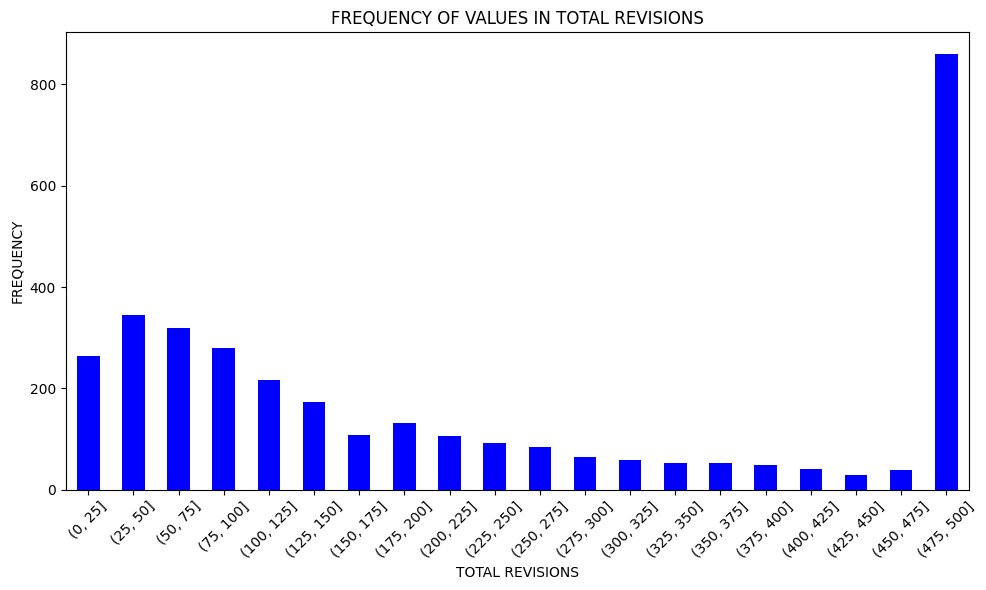

In [5]:

if "Total Revisions" in data.index:

    total_revisions = data.loc["Total Revisions"]
    bins = range(0, int(total_revisions.max()) + 25, 25)
    binned_revisions = pd.cut(total_revisions, bins=bins)
    value_counts = binned_revisions.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='blue')
    plt.title("FREQUENCY OF VALUES IN TOTAL REVISIONS")
    plt.xlabel("TOTAL REVISIONS")
    plt.ylabel("FREQUENCY")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


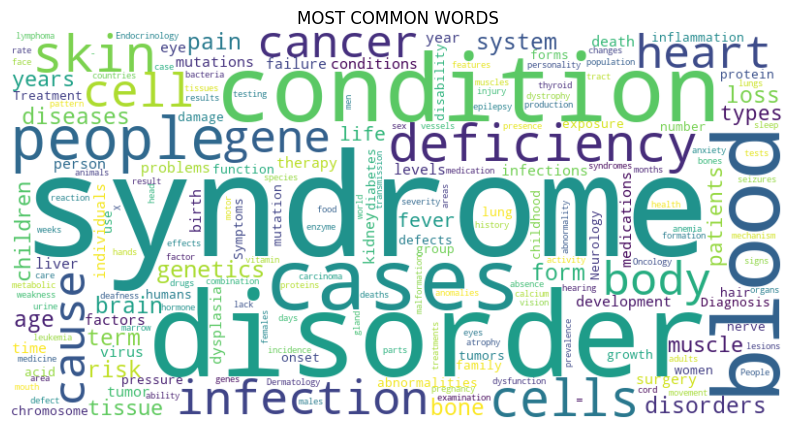

In [6]:
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

personalized_list = [token.lower() for token in data.index]
personalized_list = personalized_list + ['disease','%','type']

def process_texts(texts):
    processed_nouns = []
    for doc in nlp.pipe(texts, batch_size=50, disable=["parser", "ner"]):
        nouns = [token.text for token in doc if token.pos_ == "NOUN" and token.text not in spacy.lang.en.stop_words.STOP_WORDS and token.text not in personalized_list]
        processed_nouns.extend(nouns)
    return processed_nouns

all_texts = []
for entry in data.index:
    for col in data.columns:
        content = data.at[entry, col]
        if isinstance(content, list):
            content = ' '.join(content)
        if isinstance(content, str):
            all_texts.append(content)

all_nouns = process_texts(all_texts)
noun_counts = Counter(all_nouns)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(noun_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("MOST COMMON WORDS")
plt.show()


                        Missing Values  Missing Percentage (%)
Age Onsets                        3358               99.881023
Characteristics                   3348               99.583581
Opposit Of                        3337               99.256395
Risk Factors List                 3328               98.988697
Complications                     3328               98.988697
Can Cause                         3317               98.661511
Transmission Processes            3296               98.036883
Risk factors                      3279               97.531231
Anatomical Location               3264               97.085068
Treatments List                   3250               96.668650
Different From                    3225               95.925045
Medical Exams                     3222               95.835812
Caused By                         3156               93.872695
Prevention                        3025               89.976205
Symptoms List                     3023               89

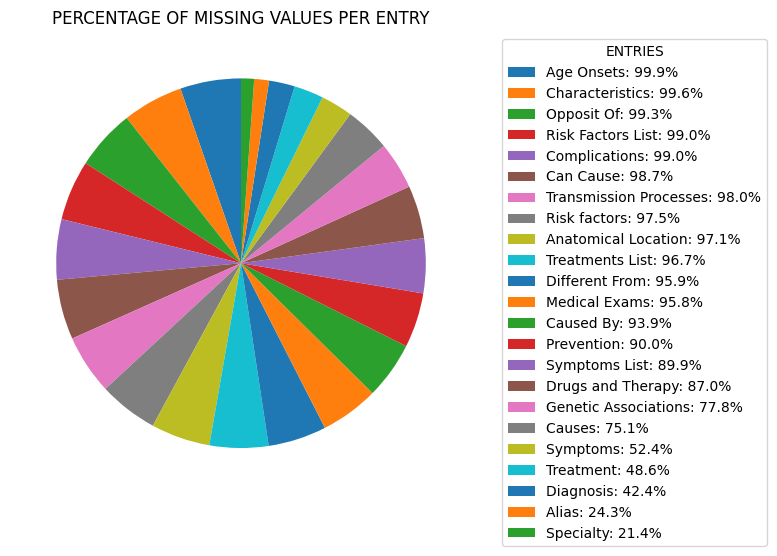

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcula o número total de valores ausentes por entrada
missing_values_per_entry = data.isnull().sum(axis=1)

# Calcula a porcentagem de valores ausentes
missing_percentages_per_entry = data.isnull().mean(axis=1) * 100

# Filtra para entradas com valores ausentes
missing_data = pd.DataFrame({
    'Missing Values': missing_values_per_entry,
    'Missing Percentage (%)': missing_percentages_per_entry
})

# Filtrar apenas as linhas com valores ausentes maiores que 0
missing_data = missing_data[missing_data['Missing Values'] > 0]

if missing_data.empty:
    print("There are no missing values.")
else:
    # Ordenar as entradas pela porcentagem de valores ausentes
    missing_data = missing_data.sort_values(by='Missing Percentage (%)', ascending=False)
    
    # Exibir a tabela
    print(missing_data)
    
    # Criar o gráfico de pizza para visualizar os dados
    plt.figure(figsize=(6, 6))
    wedges, texts = plt.pie(missing_data['Missing Percentage (%)'], startangle=90)
    plt.title("PERCENTAGE OF MISSING VALUES PER ENTRY")
    legend_labels = [f'{index}: {value:.1f}%' for index, value in zip(missing_data.index, missing_data['Missing Percentage (%)'])]
    plt.legend(legend_labels, title="ENTRIES", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
